# Importing Libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data

In [112]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [113]:
df.shape

(7043, 21)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [115]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Setting Display options to ensure feature name visibility

In [117]:
pd.set_option('display.max_columns',None)

# Warning Suppression

In [118]:
import warnings
warnings.filterwarnings('ignore')

# How many rows have missing ID ?

In [119]:
df['customerID'].isnull().sum()

0

# Drop ID Feature from the dataset

In [120]:
df=df.drop(['customerID'],axis=1)

# Label the Churn feature to 1/0

In [121]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [122]:
df['target']=np.where(df['Churn']=="Yes",1,0)

# Drop the Churn feature to retain only Target

In [123]:
df=df.drop(['Churn'],axis=1)

# Defining Target and Independent Features

In [124]:
Y=df[['target']]
X=df.drop(['target'],axis=1)

# Get the Churn Rate

In [125]:
Y.mean()

target    0.26537
dtype: float64

# Split features into Numerical and Categorical

In [126]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [127]:
num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [128]:
#Checking whether SeniorCitizon feaure is an indicator
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [129]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


# Dropping the indicator features from num to build a separate DF

In [130]:
ind=num[['SeniorCitizen']]
num=num.drop(['SeniorCitizen'],axis=1)

# Outlier Analysis of Numerical Features

In [131]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Capping and Flooring of outliers

In [183]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [184]:
num=num.apply(lambda x : outlier_cap(x))

In [185]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243407
std,24.557454,30.062810,2260.002318
min,1.000000,19.200000,19.871000
1%,1.000000,19.200000,19.883180
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Missing Value Analysis

In [132]:
num.isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [133]:
# Since the data does not contain any missing values Imputation Processes are not required

# Feature Selection - Numerical Features

# Part 1 : Remove Features with 0 Variance

In [134]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [135]:
num_1.iloc[0]

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [136]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


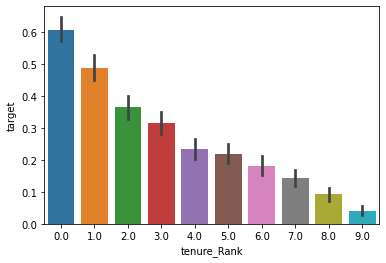

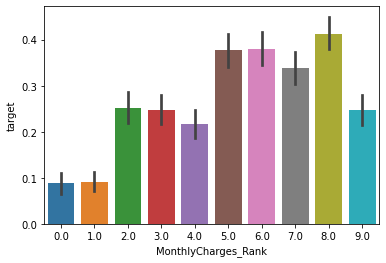

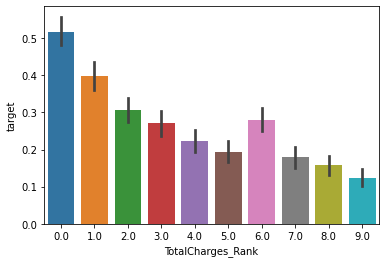

In [137]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [138]:
# All features from num_2 gets selected due to good discrimination
select_features_df_num=num_1

In [139]:
num_1.shape

(7043, 3)

# Feature Selection - Categorical Features

In [140]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

# Part 1 - Bi Variate Analysis

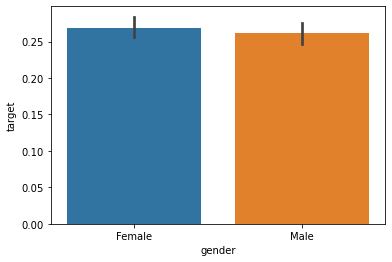

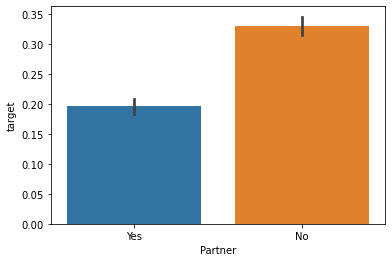

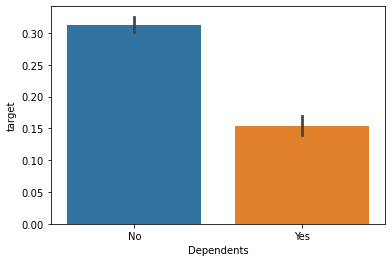

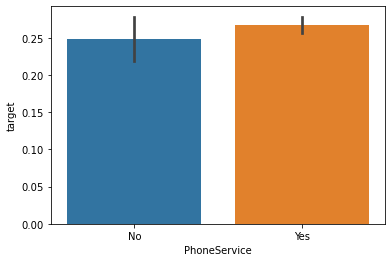

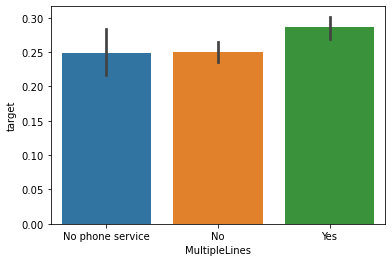

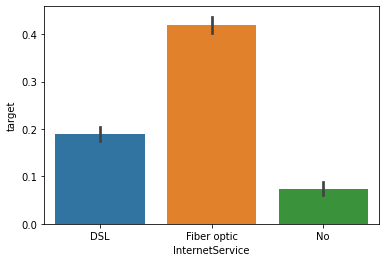

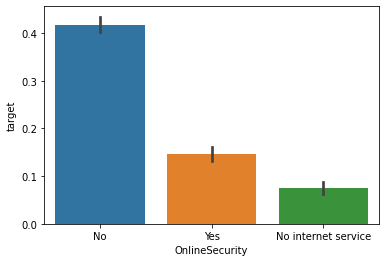

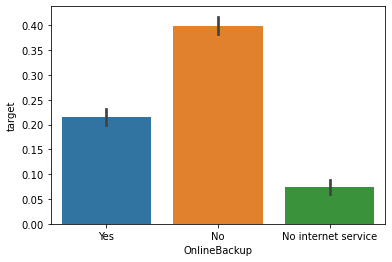

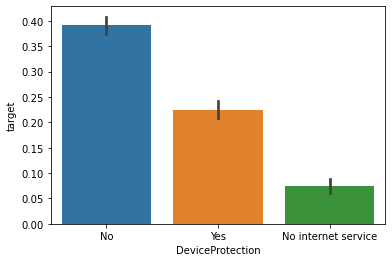

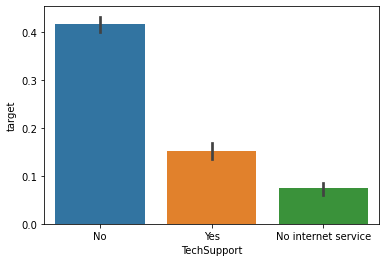

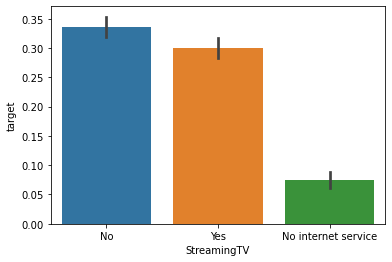

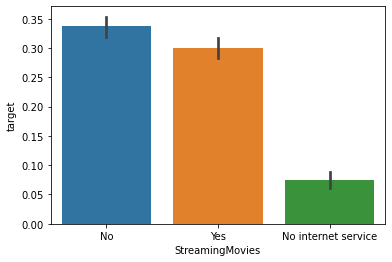

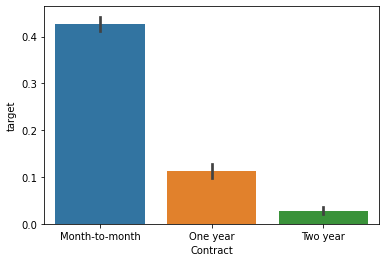

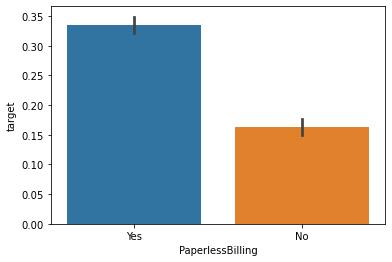

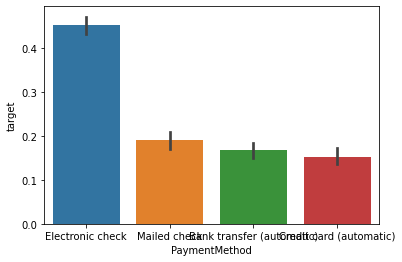

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [142]:
#As the features gender, PhoneService, MultipleLines doesn't have good discrimination, therefore dropping them
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [143]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(7043, 22)

In [144]:
X_char_dum.iloc[0]

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

# Part 2 - Select K Best (Statistical Significant Features)

In [145]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)

#This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X relative to the classes.
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

#chi-square test measures dependence between variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification.

In [146]:
select_features_df_char.iloc[0]

Partner_Yes                              1
Dependents_Yes                           0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         1
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingMovies_No internet service      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     1
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           1
PaymentMethod_Mailed check               0
Name: 0, dtype: uint8

In [147]:
select_features_df_char.shape

(7043, 20)

# Feature Selection - Numerical Indicator Features

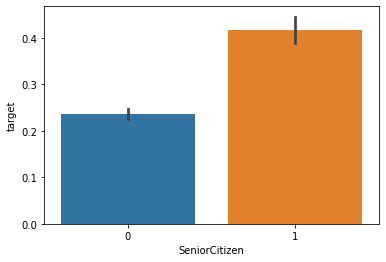

In [148]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_ind_merged, estimator=mean )
plt.show()

In [149]:
select_features_df_ind=ind

# Creating the Master Feature Set for Model Development

In [150]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

In [151]:
Y['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

# Train Test Split

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=10)

In [153]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Response Rate in Training Data target    0.266126
dtype: float64
Response Rate in Testing Data target    0.263606
dtype: float64


In [154]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice

# Model Building 

# Logistic Regression 

In [155]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [156]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,0.010756
1,Dependents_Yes,-0.095089
2,InternetService_Fiber optic,0.600727
3,InternetService_No,-0.173338
4,OnlineSecurity_No internet service,-0.173338
5,OnlineSecurity_Yes,-0.617890
6,OnlineBackup_No internet service,-0.173338
7,OnlineBackup_Yes,-0.299470
8,DeviceProtection_No internet service,-0.173338
9,DeviceProtection_Yes,-0.019076


# Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

# Grid Search for Model Optimization

In [158]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist, n_jobs=3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 6, 'min_samples_split': 50}


In [159]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

# Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [161]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.200437
TotalCharges,0.149414
InternetService_Fiber optic,0.114187
PaymentMethod_Electronic check,0.088141
MonthlyCharges,0.083469
Contract_Two year,0.076657
OnlineSecurity_Yes,0.037327
Contract_One year,0.033826
InternetService_No,0.028798
TechSupport_Yes,0.028438


# Gradient Boosting

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [163]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.209583
TotalCharges,0.187614
MonthlyCharges,0.158289
PaymentMethod_Electronic check,0.137079
InternetService_Fiber optic,0.134986
Contract_Two year,0.036311
Contract_One year,0.034229
PaperlessBilling_Yes,0.018607
OnlineSecurity_Yes,0.017222
TechSupport_Yes,0.013401


# Model Evaluation

In [164]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [165]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Logistic Regression

In [166]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.7969711310932324
Precision 0.6373390557939914
Recall 0.533213644524237
f1_score 0.5806451612903226


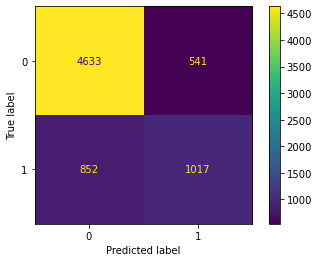

In [167]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

# Decision Tree

In [168]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7950780880265026
Precision 0.6455399061032864
Recall 0.49371633752244165
f1_score 0.5595116988809766


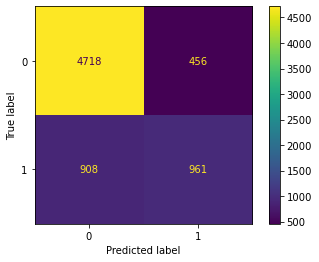

In [169]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

# Random Forest

In [170]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.7993374349266446
Precision 0.6675062972292192
Recall 0.4757630161579892
f1_score 0.5555555555555556


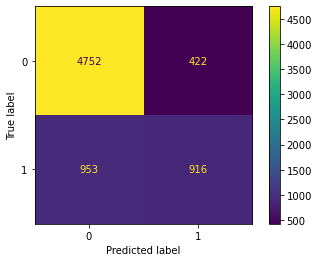

In [171]:
metrics.plot_confusion_matrix(rf,X_all,Y)

# Gradient Boosting

In [172]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7950780880265026
Precision 0.6341991341991342
Recall 0.526032315978456
f1_score 0.5750736015701667


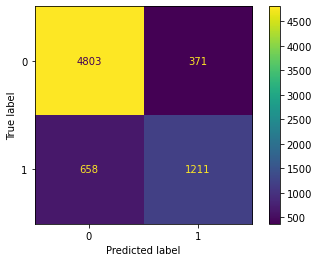

In [173]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

# Project Conclusion :- 

The GBM Model has performed the best and will be used for Customer churning

Since Tenure and Total charges are the most important features for the GBM model

Therefore building a Business Value Strategy based on Tenure and Total charges

# Getting the Model Probabilities

In [174]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1] #The method accepts a single argument that corresponds to the data over which the probabilities will be computed and returns an array of lists containing the class probabilities for the input data points
df['pred_prob_GBM']=pd.DataFrame(y_pred_prob)


# Creating Rank based on the Model Probabilities

In [175]:
df['P_Rank_GBM']=pd.qcut(df['pred_prob_GBM'].rank(method='first').values,10,duplicates='drop').codes+1 #qcut is a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins
df['Predicted_Churn_Rank']=np.where(df['P_Rank_GBM']>=8,"Top 3","Bottom 7")
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1
df['Monthly_Charge_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charges","High Charges")
df[['P_Rank_GBM','Predicted_Churn_Rank', 'Monthly_Charge_Segment','Tenure_Segment']].head()

,P_Rank_GBM,Predicted_Churn_Rank,Monthly_Charge_Segment,Tenure_Segment
0,8,Top 3,Low Charges,Low Tenure
1,3,Bottom 7,Low Charges,Low Tenure
2,9,Top 3,Low Charges,Low Tenure
3,3,Bottom 7,Low Charges,High Tenure
4,9,Top 3,High Charges,Low Tenure


# Building a Machine Learning Driven Strategy

# Identify Service Preferences

In [176]:
df_top3=df[df['Predicted_Churn_Rank']=='Top 3']

In [177]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
target=['target']



In [178]:
df_top3_services=df_top3[service_list]

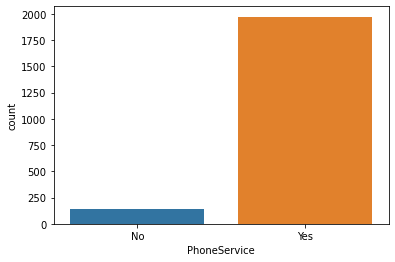

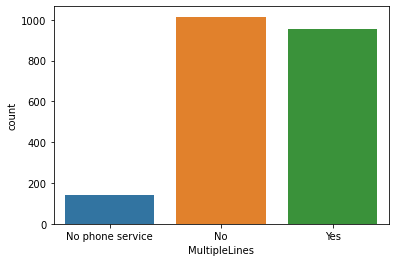

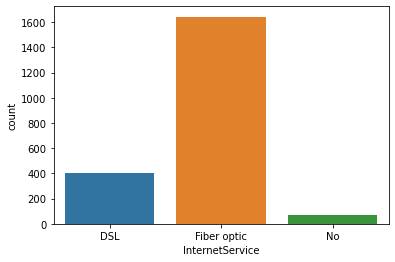

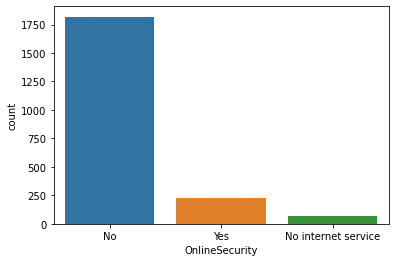

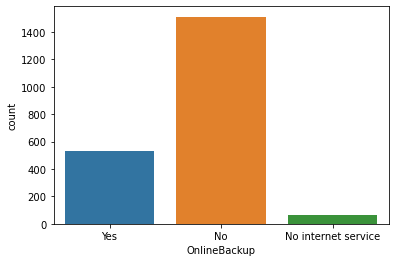

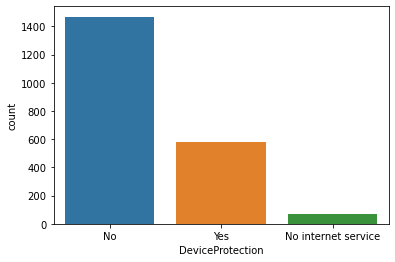

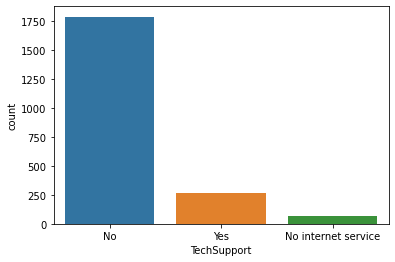

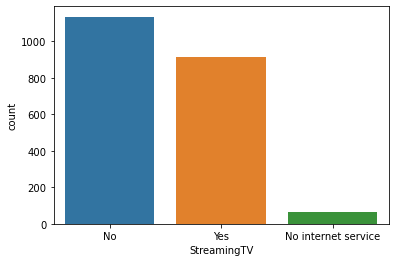

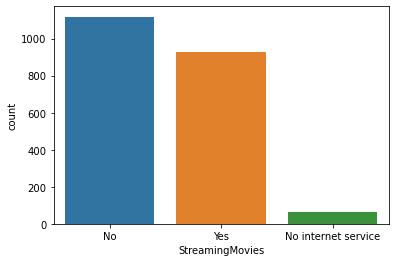

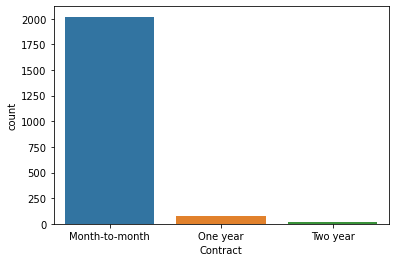

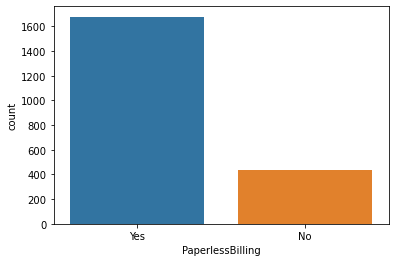

In [179]:
for col in (df_top3_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top3_services)
plt.show()

# Strategy to be used to prevent Customer Churn:-

1) Device Protection with Online Services (Online Backup and Online Security)

2) Convert customer to DSL if they are facing challenges with Fiber Optics

DSL : DSL, in full digital subscriber line, networking technology that provides broadband (high-speed) Internet connections over conventional telephone lines.

3) Offer discounts on Yearly contracts

In [180]:
df['Monthly_Charge_Segment'].value_counts()

Low Charges     3522
High Charges    3521
Name: Monthly_Charge_Segment, dtype: int64

In [181]:
df['Tenure_Segment'].value_counts()

Low Tenure     4226
High Tenure    2817
Name: Tenure_Segment, dtype: int64

In [182]:
pd.crosstab(index=df_top3['Monthly_Charge_Segment'], columns=df_top3['Tenure_Segment'],values=df_top3['target'],aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,206,1308
Low Charges,14,585


We will give first priority and offers/services to the people with high charges and low tenure which is 1308 people.